In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_table=pd.read_csv("loan_table.csv.txt",parse_dates=['date'])
borrower_table=pd.read_csv("borrower_table.csv.txt")

In [3]:
loan_table.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [4]:
borrower_table.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [5]:
#merge the tables
df=pd.merge(loan_table,borrower_table,on='loan_id')

# choose data with loan granted 
# the data with loan not granted is not useful for profit calculation
df = df[df['loan_granted'] == 1]

In [6]:
df.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
6,780070,business,2012-03-14,1,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,303138,emergency_funds,2012-08-31,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,91475,investment,2012-05-25,1,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


### EDA : visualize features and find correlation with the target variable: loan_repaid

In [15]:
def visualize(col_name):
    fig,ax= plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    sns.countplot(x=col_name, data=df, ax=ax[0])
    ax[0].set_xlabel(col_name, fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Count Plot of' +" "+col_name, fontsize=16)

    sns.barplot(x=col_name, y='loan_repaid', data=df, ax=ax[1])
    ax[1].set_xlabel(col_name, fontsize=12)
    ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
    ax[1].set_title('Loan Repaid Ratio vs.' +' '+ col_name, fontsize=16)
    plt.tight_layout()
    plt.show()

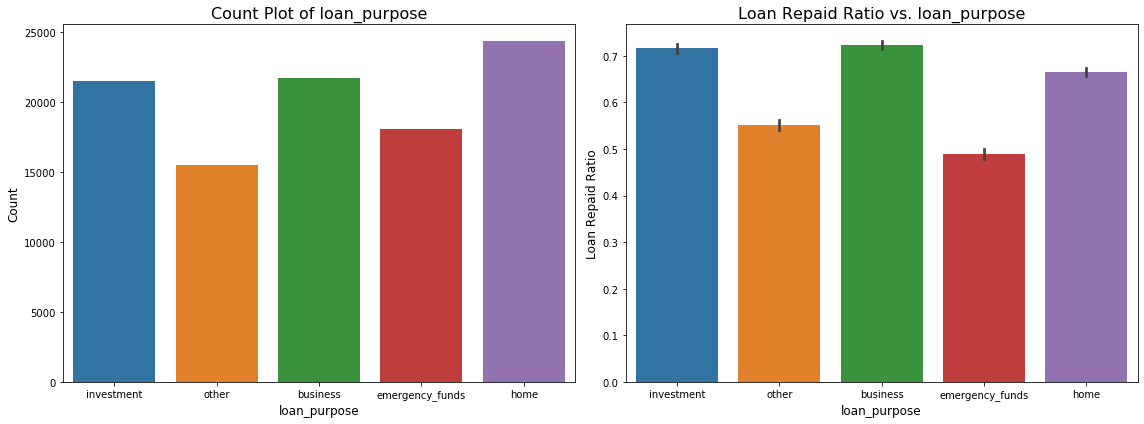

In [21]:
visualize('loan_purpose')

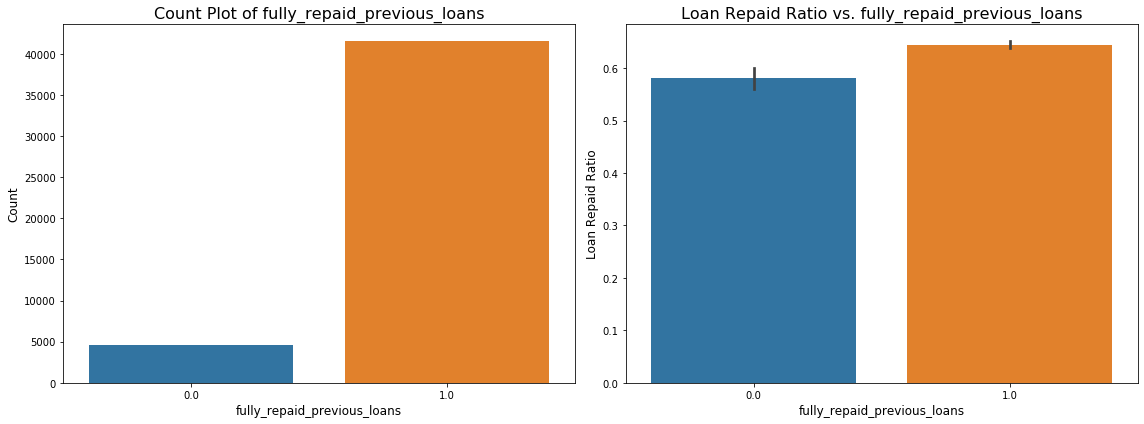

In [22]:
visualize('fully_repaid_previous_loans')

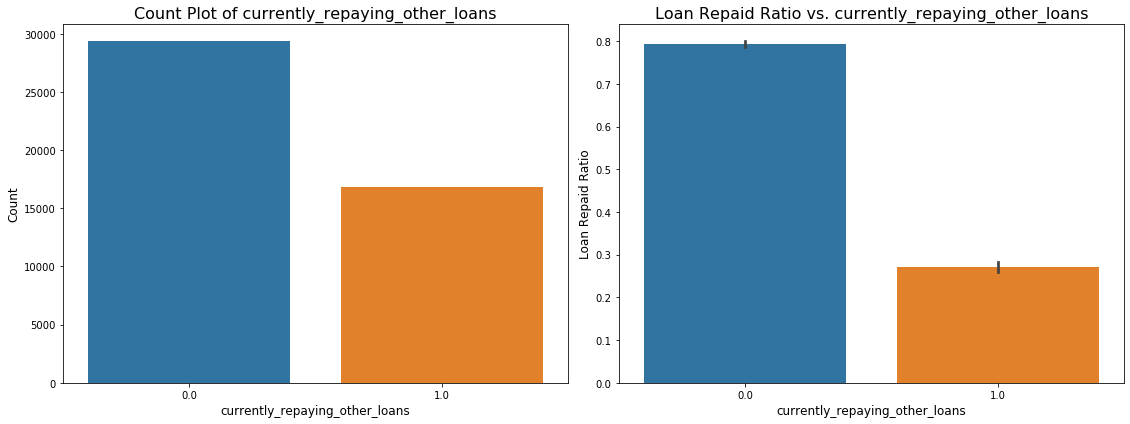

In [23]:
visualize('currently_repaying_other_loans')

Other factors can be visualized similarly. 
We can get the correlations between each variable to see how each affects the loan_repaid variable.

### Feature Engineering

In [60]:
df.corr()

,loan_id,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
loan_id,1.000000,NaN,-0.002704,0.002246,0.001710,0.005651,-0.000655,0.001768,-0.004482,-0.000531,0.012130,0.006602,0.011177,-0.000816
loan_granted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_repaid,-0.002704,NaN,1.000000,0.012824,0.038665,-0.496350,0.401911,-0.209870,0.493699,0.494341,0.305749,0.426648,0.000947,-0.136384
is_first_loan,0.002246,NaN,0.012824,1.000000,NaN,NaN,0.003657,-0.004016,0.009611,0.010356,-0.000380,-0.002121,0.002591,-0.005861
fully_repaid_previous_loans,0.001710,NaN,0.038665,NaN,1.000000,-0.015923,0.031333,-0.001759,0.014028,0.020963,0.002697,0.008098,0.009527,0.001105
currently_repaying_other_loans,0.005651,NaN,-0.496350,NaN,-0.015923,1.000000,-0.198214,0.094812,-0.251634,-0.248012,-0.154352,-0.215739,-0.008255,0.075054
total_credit_card_limit,-0.000655,NaN,0.401911,0.003657,0.031333,-0.198214,1.000000,-0.076596,0.194137,0.203409,0.156715,0.186868,0.000168,-0.059254
avg_percentage_credit_card_limit_used_last_year,0.001768,NaN,-0.209870,-0.004016,-0.001759,0.094812,-0.076596,1.000000,-0.098045,-0.101262,-0.089726,-0.102187,0.003110,0.026807
saving_amount,-0.004482,NaN,0.493699,0.009611,0.014028,-0.251634,0.194137,-0.098045,1.000000,0.238092,0.148637,0.210556,-0.004327,-0.064931
checking_amount,-0.000531,NaN,0.494341,0.010356,0.020963,-0.248012,0.203409,-0.101262,0.238092,1.000000,0.151237,0.210244,0.005039,-0.071816


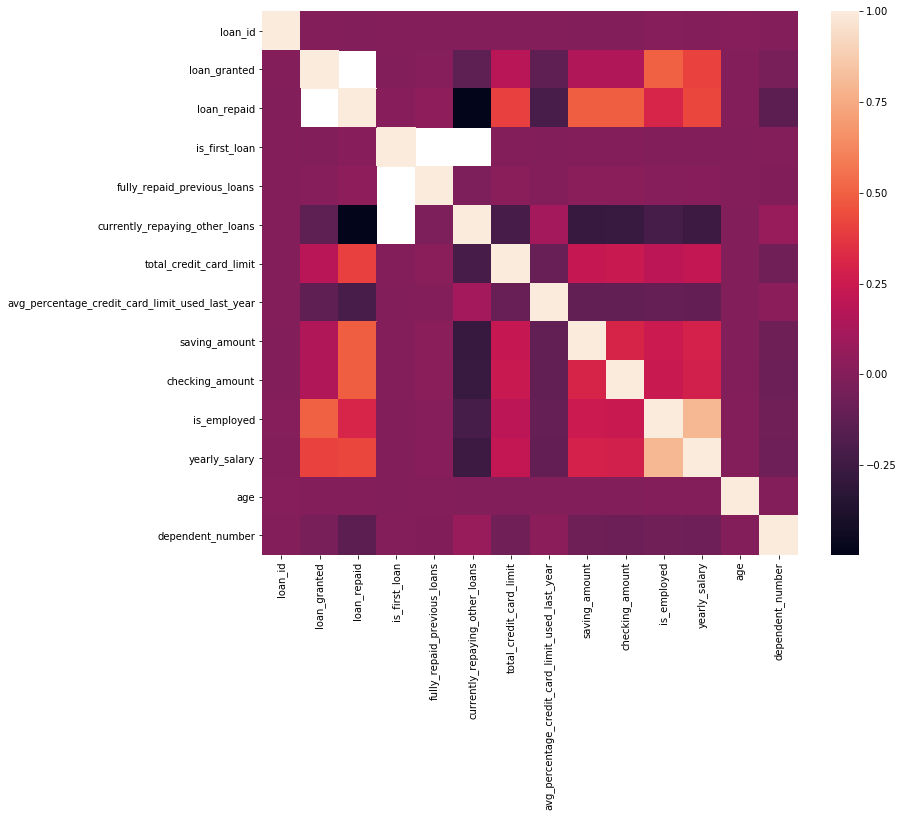

In [26]:
# feature correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax)
plt.show()

We can observe from the heatmap that the variables fully_repaid_previous_loans and currently_repaying_other_loans are both highly correlated with the is_first_loan variable. Whenever, the is_first_loan is 1, the other two variables are both Nan. 
Hence, we can drop the is_first_loan column as it's information is already captured in the other two columns.

In [8]:
df.fillna({'currently_repaying_other_loans':-1,'fully_repaid_previous_loans':-1},inplace=True)
df=df.drop(['is_first_loan'],axis=1)

We can also see from the heatmap, that is_employed and yearly_salary are correlated. If the variable is_employed=0 then the salary for most rows is 0. Hence, I would only keep the yearly_Salary variable in the model.

In [9]:
df=df.drop(['loan_granted','yearly_salary','loan_id'],axis=1)
df=df.drop(['date'],axis=1)

In [10]:
#Preparing data for the model

#One hot encoding
#Since the variable loan_purpose has only 5 levels, ohe would work in this case.
df=pd.get_dummies(df,drop_first=True)

In [11]:
df.head()

,date,loan_repaid,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,age,dependent_number,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other
3,2012-06-27,1.0,1.0,0.0,5400,0.52,3345,2764,1,58,4,0,0,0,1
4,2012-05-21,0.0,-1.0,-1.0,2900,0.76,1050,3695,1,31,4,0,0,0,0
6,2012-03-14,1.0,1.0,0.0,7800,0.30,4206,4368,1,51,2,0,0,0,0
7,2012-08-31,0.0,0.0,1.0,4300,1.02,886,1597,1,59,2,1,0,0,0
8,2012-05-25,1.0,1.0,0.0,3900,0.65,1837,3795,1,24,1,0,0,1,0


In [18]:
X= df.loc[:,df.columns != 'loan_repaid']
Y= df['loan_repaid']

In [19]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split
# split as training and test
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=0)

# split the training data as training and validation
Xtrain,Xvalid,ytrain,yvalid =  train_test_split(Xtrain,ytrain,test_size=0.2,random_state=0)

### Parameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import  metrics
def modelfit(alg, Xtrain, ytrain,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(Xtrain.values,ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(Xtrain, ytrain,eval_metric='auc')
       
    #Predict training set:
    dtrain_predictions = alg.predict(Xtrain)
    dtrain_predprob = alg.predict_proba(Xtrain)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(ytrain.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(ytrain, dtrain_predprob))
    
    print ("parameters: {}".format(xgb_param))
    print ("best {}: {:.2f}".format( alg.best_score))
    print ("best #trees: %d" % (alg.best_ntree_limit))
           

In [21]:
train_matrix = xgb.DMatrix(Xtrain,ytrain)
valid_matrix = xgb.DMatrix(Xvalid,yvalid)
test_matrix = xgb.DMatrix(Xtest,ytest)

C:\Users\sarva\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [22]:
def train(params):
    params['silent'] = 1
    params['objective'] = 'binary:logistic' 
    params['eval_metric'] = 'auc'

    num_rounds = params["num_rounds"]
    early_stopping_rounds = params["early_stop_rounds"]

    
    watchlist = [(train_matrix, 'train'), (valid_matrix, 'validate')]
    bst = xgb.train(params, train_matrix, num_rounds, watchlist, early_stopping_rounds=early_stopping_rounds)

    print ("parameters: {}".format(params))
    print ("best {}: {:.2f}".format(params["eval_metric"], bst.best_score))
    print ("best #trees: %d" % (bst.best_ntree_limit))

    return bst

Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In [23]:
from xgboost.sklearn import XGBClassifier
params = {}
params["num_rounds"] = 300
params["early_stop_rounds"] = 30
# params['min_child_weight'] = 2
params['max_depth'] = 6
params['eta'] = 0.1 #learning rate
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8

# ------------- train with xgboost
bst = train(params)

[0]	train-auc:0.956691	validate-auc:0.95213
Multiple eval metrics have been passed: 'validate-auc' will be used for early stopping.

Will train until validate-auc hasn't improved in 30 rounds.
[1]	train-auc:0.959056	validate-auc:0.953407
[2]	train-auc:0.964073	validate-auc:0.958874
[3]	train-auc:0.966333	validate-auc:0.962163
[4]	train-auc:0.96575	validate-auc:0.961456
[5]	train-auc:0.968026	validate-auc:0.963874
[6]	train-auc:0.968456	validate-auc:0.964506
[7]	train-auc:0.968634	validate-auc:0.964564
[8]	train-auc:0.969115	validate-auc:0.965092
[9]	train-auc:0.969245	validate-auc:0.965261
[10]	train-auc:0.969872	validate-auc:0.965885
[11]	train-auc:0.970284	validate-auc:0.966119
[12]	train-auc:0.970434	validate-auc:0.966102
[13]	train-auc:0.97054	validate-auc:0.966122
[14]	train-auc:0.971	validate-auc:0.966652
[15]	train-auc:0.971216	validate-auc:0.966883
[16]	train-auc:0.971347	validate-auc:0.966973
[17]	train-auc:0.971523	validate-auc:0.967146
[18]	train-auc:0.971566	validate-auc:0.

From here we can see that the best number of trees is 72

In [24]:
n_trees = bst.best_ntree_limit
n_trees

72

### Retrain the Model with all the training data

In [26]:
# combine training set and validation set together
Xalltrain = pd.concat([Xtrain,Xvalid],axis=0)
yalltrain = pd.concat([ytrain,yvalid],axis=0)
alltrain_matrix = xgb.DMatrix(Xalltrain,yalltrain)

In [27]:
watchlist = [(alltrain_matrix, 'train')]
all_bst = xgb.train(params, alltrain_matrix, n_trees,watchlist)

[0]	train-auc:0.95673
[1]	train-auc:0.960007
[2]	train-auc:0.96221
[3]	train-auc:0.962307
[4]	train-auc:0.962239
[5]	train-auc:0.960539
[6]	train-auc:0.96416
[7]	train-auc:0.966202
[8]	train-auc:0.967313
[9]	train-auc:0.966951
[10]	train-auc:0.968393
[11]	train-auc:0.969153
[12]	train-auc:0.969512
[13]	train-auc:0.969871
[14]	train-auc:0.970603
[15]	train-auc:0.970692
[16]	train-auc:0.971034
[17]	train-auc:0.971177
[18]	train-auc:0.971236
[19]	train-auc:0.971484
[20]	train-auc:0.971652
[21]	train-auc:0.971823
[22]	train-auc:0.972084
[23]	train-auc:0.972183
[24]	train-auc:0.972268
[25]	train-auc:0.972378
[26]	train-auc:0.972518
[27]	train-auc:0.972574
[28]	train-auc:0.972777
[29]	train-auc:0.972979
[30]	train-auc:0.973178
[31]	train-auc:0.973261
[32]	train-auc:0.973372
[33]	train-auc:0.973519
[34]	train-auc:0.973689
[35]	train-auc:0.973843
[36]	train-auc:0.973982
[37]	train-auc:0.974138
[38]	train-auc:0.974242
[39]	train-auc:0.974354
[40]	train-auc:0.974437
[41]	train-auc:0.974517
[42]	

### Choosing best threshold value (probability cutoff)

In [28]:
from sklearn.metrics import roc_curve
yvalid_true = valid_matrix.get_label()

yvalid_pred_probas = bst.predict(valid_matrix, ntree_limit=bst.best_ntree_limit)

fpr,tpr,thresholds = roc_curve(yvalid_true,yvalid_pred_probas)
roc = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresholds})

Looping through thresholds to maximize profit

In [29]:
  
def cal_profit(repaid_loan,probs,threshold):
    total_profit = 0
    for (repaid,prob) in zip(repaid_loan,probs):
        if prob > threshold:
            if repaid==1:
                total_profit+=1
            else: #repaid=0
                total_profit+=-1
            
    return total_profit

In [30]:
profits=[cal_profit(yvalid.values,yvalid_pred_probas,threshold) for threshold in roc.Thresholds]

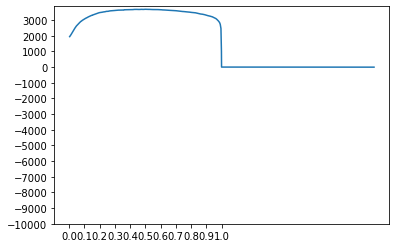

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(roc.Thresholds,profits)
plt.yticks(range(-10000,4000,1000))
_ = plt.xticks(np.linspace(0,1,11))
plt.rc('figure',figsize=(8,8))

In [32]:
valid_threshold_profits = pd.DataFrame({'threshold':roc.Thresholds,'profit':profits})
temp = valid_threshold_profits.loc[  valid_threshold_profits.profit.argmax()   ,:]
temp

C:\Users\sarva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


threshold       0.507037
profit       3696.000000
Name: 622, dtype: float64

We can see that the threshold should be 0.507.

### Test

In [33]:
from sklearn.metrics import classification_report,accuracy_score
ytest_pred_probas = all_bst.predict(test_matrix, ntree_limit=n_trees)
ytest_pred = (ytest_pred_probas>0.507).astype(int)

print ("test accuracy: ",accuracy_score(ytest,ytest_pred))

test accuracy:  0.9078128278659858


In [34]:
print (classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      5011
         1.0       0.95      0.91      0.93      9286

    accuracy                           0.91     14297
   macro avg       0.90      0.91      0.90     14297
weighted avg       0.91      0.91      0.91     14297



### Comparing profits between old and new models

In [35]:
def cal_profit_old(loan_repaid):
    total_profit=0
    for repaid in loan_repaid:
        if repaid==1:
            total_profit+=1
        else:
            total_profit+=-1
    return total_profit

In [36]:
#Profit due to old model
cal_profit_old(ytest.values)

4275

In [37]:
#profit due to new model
cal_profit(ytest.values,ytest_pred_probas,0.45)

7966

We can see a significant increase in profits if we use the new model where in a user is granted a loan if the model's predicted probablity is higher than the threshold value of 0.507.

### Important features

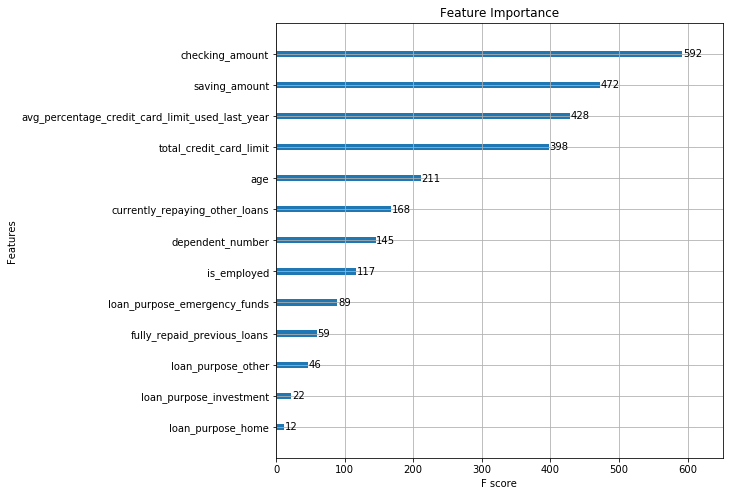

In [38]:
xgb.plot_importance(all_bst,title='Feature Importance')